## Загрузка данных

Данные - https://www.kaggle.com/usdot/flight-delays
Описание - Сводная информация о количестве своевременных, задержанных, отмененных и измененных рейсов в США за 2015 год (5.8 млн записей)


Задачи:
* Найти аэропорт с минимальной задержкой вылета 
* Самая пунктуальная авиакомпания на прилет в Los Angeles International Airport
* Найти аэропорт, где самолёты проводят больше всего времени на рулении (среднее значение)
* Построить модель которая будет выбирать топ 3 аэропорта прилета (вероятность опоздания минимальная – RMSE метрика),  в зависимости от аэропорта вылета  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
flights=pd.read_csv('flights.csv')
airports = pd.read_csv('airports.csv')
airlines=pd.read_csv('airlines.csv')

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
display(flights.head())
display(flights.sample(5))
display(flights.tail())

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
2050382,2015,5,11,1,WN,2240,N449WN,IND,DCA,750,...,914.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2697747,2015,6,19,5,EV,4724,N13970,ORD,CAE,1351,...,1657.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
726289,2015,2,17,2,US,1796,N724UW,JAX,CLT,1955,...,2125.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2413441,2015,6,2,2,OO,5367,N494CA,SFO,ONT,1550,...,1713.0,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1329099,2015,3,27,5,DL,1494,N313US,PHL,ATL,1130,...,1337.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,2359,...,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
flights.shape

(5819079, 31)

In [5]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

**Проведем анализ каждого столбца датасета в отдельности**

In [6]:
# создадим функцию для проверки уникальных значений по каждому столбцу и наличию пропусков
def unique(flights, column):
    display(flights[column].unique())
    print('Всего уникальных значений:', len(flights[column].unique()))
    print('Всего пропусков:', flights[column].isna().sum())

In [7]:
list_columns=flights.keys()

In [8]:
list_columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [9]:
for i in list_columns:
    print(i)
    print('-----------------------------------------------------------------')
    unique(flights, i)   
    print('-----------------------------------------------------------------')

YEAR
-----------------------------------------------------------------


array([2015], dtype=int64)

Всего уникальных значений: 1
Всего пропусков: 0
-----------------------------------------------------------------
MONTH
-----------------------------------------------------------------


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

Всего уникальных значений: 12
Всего пропусков: 0
-----------------------------------------------------------------
DAY
-----------------------------------------------------------------


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

Всего уникальных значений: 31
Всего пропусков: 0
-----------------------------------------------------------------
DAY_OF_WEEK
-----------------------------------------------------------------


array([4, 5, 6, 7, 1, 2, 3], dtype=int64)

Всего уникальных значений: 7
Всего пропусков: 0
-----------------------------------------------------------------
AIRLINE
-----------------------------------------------------------------


array(['AS', 'AA', 'US', 'DL', 'NK', 'UA', 'HA', 'B6', 'OO', 'EV', 'MQ',
       'F9', 'WN', 'VX'], dtype=object)

Всего уникальных значений: 14
Всего пропусков: 0
-----------------------------------------------------------------
FLIGHT_NUMBER
-----------------------------------------------------------------


array([  98, 2336,  840, ..., 6777, 6895, 6887], dtype=int64)

Всего уникальных значений: 6952
Всего пропусков: 0
-----------------------------------------------------------------
TAIL_NUMBER
-----------------------------------------------------------------


array(['N407AS', 'N3KUAA', 'N171US', ..., 'N7LEAA', 'N850DN', 'N8676A'],
      dtype=object)

Всего уникальных значений: 4898
Всего пропусков: 14721
-----------------------------------------------------------------
ORIGIN_AIRPORT
-----------------------------------------------------------------


array(['ANC', 'LAX', 'SFO', 'SEA', 'LAS', 'DEN', 'SLC', 'PDX', 'FAI',
       'MSP', 'PHX', 'SJU', 'PBG', 'IAG', 'PSE', 'BQN', 'ORD', 'GEG',
       'HNL', 'ONT', 'MCO', 'BOS', 'HIB', 'ABR', 'MAF', 'DFW', 'MKE',
       'IAH', 'BNA', 'BRO', 'VPS', 'BOI', 'BJI', 'SGF', 'PHL', 'SBN',
       'RDD', 'EUG', 'IAD', 'BUF', 'PWM', 'JFK', 'CRP', 'PIA', 'FAT',
       'SMF', 'AUS', 'MCI', 'ATL', 'JAX', 'MFR', 'IDA', 'MSN', 'DCA',
       'SAT', 'CHS', 'SBA', 'SMX', 'IND', 'CLE', 'GSP', 'BDL', 'ABI',
       'RIC', 'BFL', 'OMA', 'RDM', 'FLL', 'CID', 'TPA', 'SYR', 'ROC',
       'TYR', 'LAN', 'XNA', 'GSO', 'EWR', 'PBI', 'RSW', 'OAK', 'PVD',
       'RNO', 'PIT', 'ABQ', 'MIA', 'BWI', 'LGA', 'TUL', 'LIT', 'MSY',
       'OKC', 'ATW', 'PNS', 'MEM', 'TYS', 'MHT', 'SAV', 'CLT', 'GRB',
       'ABE', 'JAN', 'OAJ', 'FAR', 'ERI', 'LEX', 'CWA', 'MSO', 'TTN',
       'AMA', 'CLL', 'HOU', 'JLN', 'MLI', 'RDU', 'CVG', 'MHK', 'MOB',
       'TLH', 'BHM', 'CAE', 'TXK', 'ACY', 'DTW', 'RAP', 'TUS', 'EAU',
       'DLH', 'FSD',

Всего уникальных значений: 930
Всего пропусков: 0
-----------------------------------------------------------------
DESTINATION_AIRPORT
-----------------------------------------------------------------


array(['SEA', 'PBI', 'CLT', 'MIA', 'ANC', 'MSP', 'DFW', 'ATL', 'IAH',
       'PDX', 'MCI', 'FLL', 'ORD', 'HNL', 'PHX', 'EWR', 'JFK', 'MCO',
       'BOS', 'BDL', 'ITO', 'SFO', 'KOA', 'OGG', 'MYR', 'DTW', 'LIH',
       'DEN', 'SJU', 'LAX', 'BWI', 'IAD', 'BQN', 'BUF', 'LGA', 'HOU',
       'SLC', 'PHL', 'SJC', 'OAK', 'LGB', 'TPA', 'DCA', 'TTN', 'BTR',
       'LAS', 'RSW', 'BRD', 'STL', 'RKS', 'MBS', 'SNA', 'MEI', 'MDW',
       'SAN', 'RIC', 'AUS', 'OTZ', 'PIT', 'JAX', 'MSY', 'ONT', 'PSP',
       'BUR', 'DAL', 'CVG', 'SMF', 'RDU', 'JMS', 'BNA', 'DSM', 'MAF',
       'BOI', 'ELP', 'TUS', 'SCC', 'HPN', 'STT', 'MDT', 'RHI', 'SBP',
       'MKE', 'JNU', 'CMH', 'CLD', 'KTN', 'CAK', 'CRP', 'CLE', 'GPT',
       'SHV', 'TYS', 'IND', 'LIT', 'SAT', 'SRQ', 'TUL', 'GRK', 'PNS',
       'BTV', 'CHS', 'DAY', 'OKC', 'SAV', 'XNA', 'COS', 'GJT', 'BZN',
       'PUB', 'HRL', 'HDN', 'MEM', 'GEG', 'ORH', 'SYR', 'GSO', 'VPS',
       'LAW', 'ACY', 'LBB', 'JAC', 'BIL', 'EUG', 'ASE', 'TVC', 'MTJ',
       'CAE', 'PVD',

Всего уникальных значений: 930
Всего пропусков: 0
-----------------------------------------------------------------
SCHEDULED_DEPARTURE
-----------------------------------------------------------------


array([  5,  10,  20, ..., 421, 337, 409], dtype=int64)

Всего уникальных значений: 1321
Всего пропусков: 0
-----------------------------------------------------------------
DEPARTURE_TIME
-----------------------------------------------------------------


array([2.354e+03, 2.000e+00, 1.800e+01, ..., 3.460e+02, 4.030e+02,
       3.540e+02])

Всего уникальных значений: 1441
Всего пропусков: 86153
-----------------------------------------------------------------
DEPARTURE_DELAY
-----------------------------------------------------------------


array([ -11.,   -8.,   -2., ...,  888., 1194., 1649.])

Всего уникальных значений: 1218
Всего пропусков: 86153
-----------------------------------------------------------------
TAXI_OUT
-----------------------------------------------------------------


array([ 21.,  12.,  16.,  15.,  11.,  18.,  13.,  17.,  28.,  25.,   9.,
        30.,  14.,  10.,  nan,  43.,  24.,  19.,  22.,  23.,  37.,  31.,
         7.,  32.,  26.,  33.,  42.,  27.,  20.,  38.,   4.,  29.,   8.,
        41.,  56.,  48.,  40.,  34.,   3.,  36.,  61.,  35.,   6.,  45.,
        39.,  46.,  62.,  49.,   5.,  57.,  64.,  63.,  47.,  54.,  55.,
        44.,  59.,  50.,  76., 113.,  73.,  58.,  52.,   2.,  72.,  51.,
       110.,  53.,  75.,  84.,  77.,  82.,  70., 105.,  69.,  71.,  81.,
        66.,  80.,  99.,  60.,  74.,  95.,  89., 136., 131.,  79.,  68.,
       120.,  67.,  88.,   1.,  65., 176., 160., 104., 111., 112.,  83.,
        85., 121., 100.,  91.,  97.,  93.,  87., 129.,  92.,  90.,  98.,
       107., 124., 146.,  86.,  78., 115., 103.,  94., 101., 102., 126.,
       116., 132., 118., 106., 130., 109., 114., 128.,  96., 141., 125.,
       149., 147., 122., 117., 108., 119., 137., 133., 135., 169., 152.,
       139., 143., 155., 153., 127., 150., 134., 14

Всего уникальных значений: 185
Всего пропусков: 89047
-----------------------------------------------------------------
WHEELS_OFF
-----------------------------------------------------------------


array([ 15.,  14.,  34., ..., 356., 346., 407.])

Всего уникальных значений: 1441
Всего пропусков: 89047
-----------------------------------------------------------------
SCHEDULED_TIME
-----------------------------------------------------------------


array([205., 280., 286., 285., 235., 217., 181., 273., 195., 221., 173.,
       268., 214., 215., 189., 204., 210., 218., 193., 162., 338., 147.,
       183., 213., 207., 245., 227., 239., 170., 370., 323., 255., 208.,
       123., 120., 184., 246., 224., 200., 185., 240., 174., 186., 241.,
       228.,  70.,  49.,  89.,  42.,  36., 175.,  63., 140.,  68.,  69.,
        87., 165., 161., 178., 150., 141., 103.,  74.,  66., 112.,  60.,
        37.,  65.,  95., 230., 142., 157., 125.,  55., 160., 188.,  90.,
       163., 146., 167.,  88.,  85., 225.,  61.,  75., 212., 101., 136.,
       223., 122., 143., 105., 137., 104., 145., 139., 251., 209.,  77.,
       124., 116., 129., 190., 154.,  96., 314., 194., 119., 180.,  59.,
       149., 135., 249., 166., 131., 341., 156., 275.,  83.,  50.,  94.,
        80., 192., 148.,  97., 110., 115., 130., 270., 100., 257., 244.,
       404., 311., 250., 281., 114., 164., 155., 109., 234.,  73., 102.,
       151., 171., 168., 203., 232., 128.,  84., 11

Всего уникальных значений: 551
Всего пропусков: 6
-----------------------------------------------------------------
ELAPSED_TIME
-----------------------------------------------------------------


array([194., 279., 293., 281., 215., 230., 170., 249., 193., 203., 149.,
       266., 210., 199., 198., 200., 217., 201., 186., 143., 347., 147.,
       276., 163., 175., 218., 220., 224., 208., 234.,  nan, 231., 385.,
       322., 241., 248., 191., 125., 209., 178., 264., 183., 247., 196.,
       243., 258., 232.,  74.,  51.,  85.,  48.,  36., 182.,  55., 134.,
        78.,  67., 168., 155., 189., 150., 137., 106.,  72.,  57., 110.,
        35.,  70., 142., 157., 138.,  44., 146., 167., 180., 153.,  52.,
        75.,  80., 164.,  84., 114., 101., 103., 132., 188., 113., 144.,
       136., 197.,  59., 190.,  66., 202., 104., 122., 128., 133.,  99.,
       282., 109., 179.,  61., 172.,  76., 223., 177., 343., 251., 269.,
        73.,  50.,  83.,  93.,  90., 160., 120., 152.,  79., 131., 130.,
       135.,  88., 145.,  81., 270., 256., 141., 242., 165., 396., 291.,
       227., 173., 294., 174., 181., 151., 127., 102.,  68., 226., 156.,
       222., 124., 108.,  94., 166., 162., 239., 24

Всего уникальных значений: 713
Всего пропусков: 105071
-----------------------------------------------------------------
AIR_TIME
-----------------------------------------------------------------


array([169., 263., 266., 258., 199., 206., 154., 228., 173., 186., 133.,
       238., 188., 176., 166., 171., 187., 128., 311., 255., 150., 156.,
       205., 217.,  nan, 182., 148., 361., 298., 220., 170., 231., 174.,
       103., 149., 239., 183., 225., 160., 224., 163., 237., 214.,  39.,
        35.,  61.,  30., 179.,  20., 147.,  38., 112.,  41., 146., 132.,
       111.,  66.,  49.,  42.,  79.,  34.,  21., 210., 125., 138.,  96.,
        22., 143., 127., 142., 194.,  56.,  50., 184.,  33.,  54., 129.,
        95., 178.,  84., 105., 109., 158.,  72.,  36., 107., 152.,  44.,
       180.,  86.,  91., 120., 104., 134.,  27.,  78., 234., 118.,  46.,
       159.,  28., 110.,  58., 195., 198., 130., 162., 310., 131., 216.,
       243.,  43.,  48.,  25.,  65.,  92., 123., 100., 135.,  57.,  90.,
        88., 114., 175.,  63., 230.,  76., 253., 222., 126.,  52., 376.,
       268., 201., 155., 273.,  87., 137., 124., 106.,  80., 151., 139.,
       190.,  82., 202.,  99., 141.,  60., 145., 15

Всего уникальных значений: 676
Всего пропусков: 105071
-----------------------------------------------------------------
DISTANCE
-----------------------------------------------------------------


array([1448, 2330, 2296, ...,  876, 1100, 1672], dtype=int64)

Всего уникальных значений: 1363
Всего пропусков: 0
-----------------------------------------------------------------
WHEELS_ON
-----------------------------------------------------------------


array([404., 737., 800., ..., 318., 324., 322.])

Всего уникальных значений: 1441
Всего пропусков: 92513
-----------------------------------------------------------------
TAXI_IN
-----------------------------------------------------------------


array([  4.,  11.,   8.,   5.,   6.,   3.,   7.,   2.,  40.,  10.,  nan,
        12.,   9.,  13.,  19.,  14.,  15.,  30.,  17.,  16.,  23.,  52.,
        21.,  26.,  80.,  29.,  24.,  20.,  22.,  18.,  32.,  55.,  33.,
        34.,   1.,  27.,  28.,  25.,  36.,  41.,  39.,  37.,  61.,  74.,
        58.,  31.,  46.,  42.,  44.,  35.,  43.,  45.,  56.,  48.,  38.,
        53.,  59.,  50.,  49.,  67.,  47.,  70.,  51.,  84.,  62.,  54.,
        60., 103.,  63.,  66.,  82.,  57.,  91.,  72.,  64.,  69., 111.,
        65.,  78.,  68.,  79.,  95.,  88.,  89.,  71.,  90.,  77.,  76.,
        73.,  87.,  75.,  93.,  83.,  81.,  96., 105.,  92.,  86.,  97.,
       122., 146., 123., 127., 138., 124., 136., 100., 134., 109., 101.,
       112., 133., 142., 117., 115., 170., 120., 149., 179., 128., 135.,
        85., 137., 108., 174., 141., 158., 145., 167., 106., 113., 107.,
        99., 154., 126., 125.,  98., 104., 114., 144., 102., 162., 151.,
       140., 119., 148., 143.,  94., 152., 130., 13

Всего уникальных значений: 186
Всего пропусков: 92513
-----------------------------------------------------------------
SCHEDULED_ARRIVAL
-----------------------------------------------------------------


array([430, 750, 806, ..., 324, 332, 241], dtype=int64)

Всего уникальных значений: 1435
Всего пропусков: 0
-----------------------------------------------------------------
ARRIVAL_TIME
-----------------------------------------------------------------


array([408., 741., 811., ..., 328., 317., 357.])

Всего уникальных значений: 1441
Всего пропусков: 92513
-----------------------------------------------------------------
ARRIVAL_DELAY
-----------------------------------------------------------------


array([ -22.,   -9.,    5., ..., 1115., 1372., 1076.])

Всего уникальных значений: 1241
Всего пропусков: 105071
-----------------------------------------------------------------
DIVERTED
-----------------------------------------------------------------


array([0, 1], dtype=int64)

Всего уникальных значений: 2
Всего пропусков: 0
-----------------------------------------------------------------
CANCELLED
-----------------------------------------------------------------


array([0, 1], dtype=int64)

Всего уникальных значений: 2
Всего пропусков: 0
-----------------------------------------------------------------
CANCELLATION_REASON
-----------------------------------------------------------------


array([nan, 'A', 'B', 'C', 'D'], dtype=object)

Всего уникальных значений: 5
Всего пропусков: 5729195
-----------------------------------------------------------------
AIR_SYSTEM_DELAY
-----------------------------------------------------------------


array([      nan, 2.500e+01, 4.300e+01, 0.000e+00, 2.000e+01, 1.700e+01,
       1.300e+01, 7.000e+00, 2.200e+01, 1.400e+01, 4.000e+00, 6.000e+00,
       1.600e+01, 2.700e+01, 1.200e+01, 2.000e+00, 1.500e+01, 1.800e+01,
       3.200e+01, 8.500e+01, 3.000e+00, 5.000e+00, 8.600e+01, 5.800e+01,
       3.500e+01, 3.400e+01, 3.300e+01, 1.100e+01, 9.000e+00, 2.600e+01,
       2.800e+01, 4.000e+01, 2.300e+01, 1.900e+01, 2.400e+01, 9.700e+01,
       2.900e+01, 2.100e+01, 1.000e+00, 1.000e+01, 8.000e+00, 3.000e+01,
       6.700e+01, 4.800e+01, 6.500e+01, 3.100e+01, 4.100e+01, 4.200e+01,
       3.900e+01, 3.600e+01, 5.100e+01, 8.100e+01, 4.600e+01, 1.640e+02,
       5.200e+01, 8.800e+01, 4.900e+01, 4.500e+01, 3.700e+01, 5.000e+01,
       5.400e+01, 5.900e+01, 1.380e+02, 5.300e+01, 7.200e+01, 6.800e+01,
       7.700e+01, 6.100e+01, 6.000e+01, 4.400e+01, 3.800e+01, 7.600e+01,
       4.700e+01, 7.300e+01, 5.700e+01, 7.400e+01, 8.700e+01, 5.600e+01,
       6.300e+01, 1.350e+02, 1.200e+02, 1.160e+02, 

Всего уникальных значений: 571
Всего пропусков: 4755640
-----------------------------------------------------------------
SECURITY_DELAY
-----------------------------------------------------------------


array([ nan,   0.,  46., 107.,  11.,  10.,  30.,  19.,   6.,   1.,   2.,
         9.,  17.,  34.,  35.,  15.,  28.,  12.,  27.,  16.,  99.,  56.,
        20.,  58.,   7.,  61.,  13.,   3.,  14.,  23.,  21.,   4.,  54.,
        52.,  53.,  64.,  24.,  18.,  50.,  96.,  62.,  26.,  32.,  22.,
         5.,  29.,  39.,  63.,  45.,  25.,  80.,  91.,  59.,  73.,  31.,
         8.,  40., 104.,  36.,  41., 237., 227.,  68.,  71.,  47.,  43.,
        55.,  75.,  37.,  98.,  57., 241.,  92.,  78.,  42.,  38.,  97.,
       168., 141., 142.,  33.,  90.,  51., 140.,  69., 121., 190.,  88.,
       123.,  79., 204.,  77., 158., 160., 215., 221.,  49.,  44.,  94.,
        84.,  65.,  86., 102.,  76.,  81., 205., 101.,  95.,  85., 116.,
        48., 175.,  67., 126.,  66.,  72., 138.,  74., 103., 118., 154.,
       191.,  60., 148., 214., 196., 135., 256., 110., 124., 203., 120.,
       164., 186.,  93.,  83.,  70., 181., 122.,  82., 108., 573., 128.,
        89., 106., 440., 127., 171., 129., 133., 14

Всего уникальных значений: 155
Всего пропусков: 4755640
-----------------------------------------------------------------
AIRLINE_DELAY
-----------------------------------------------------------------


array([  nan,    0.,   15., ...,  879., 1185., 1636.])

Всего уникальных значений: 1068
Всего пропусков: 4755640
-----------------------------------------------------------------
LATE_AIRCRAFT_DELAY
-----------------------------------------------------------------


array([      nan, 0.000e+00, 8.800e+01, 3.100e+01, 3.060e+02, 3.000e+00,
       8.000e+00, 7.000e+00, 5.000e+00, 1.200e+01, 2.000e+01, 1.100e+01,
       1.900e+01, 2.900e+01, 4.800e+01, 2.500e+01, 1.300e+01, 7.500e+01,
       2.350e+02, 1.000e+01, 6.000e+00, 6.200e+01, 8.000e+01, 1.600e+01,
       1.010e+02, 3.700e+01, 7.400e+01, 1.400e+01, 7.700e+01, 6.300e+01,
       4.000e+01, 1.840e+02, 5.600e+01, 1.400e+02, 3.900e+01, 2.600e+01,
       6.500e+01, 4.670e+02, 8.900e+01, 1.000e+02, 3.300e+01, 4.000e+00,
       1.270e+02, 1.160e+02, 2.000e+00, 9.000e+00, 7.800e+01, 2.100e+01,
       7.600e+01, 1.800e+01, 7.300e+01, 5.900e+01, 1.000e+00, 1.210e+02,
       1.220e+02, 4.200e+01, 2.200e+01, 2.300e+01, 2.800e+01, 1.740e+02,
       2.400e+01, 1.280e+02, 1.020e+02, 6.700e+01, 6.100e+01, 2.640e+02,
       1.500e+01, 3.500e+01, 3.400e+01, 4.300e+01, 1.660e+02, 4.100e+01,
       2.700e+01, 5.700e+01, 1.700e+01, 7.100e+01, 3.800e+01, 3.600e+01,
       5.200e+01, 3.000e+01, 1.250e+02, 5.100e+01, 

Всего уникальных значений: 696
Всего пропусков: 4755640
-----------------------------------------------------------------
WEATHER_DELAY
-----------------------------------------------------------------


array([      nan, 0.000e+00, 1.020e+02, 1.280e+02, 2.130e+02, 1.160e+02,
       1.110e+02, 1.070e+02, 5.400e+01, 1.700e+01, 1.310e+02, 9.300e+01,
       1.600e+01, 1.560e+02, 4.000e+00, 5.000e+01, 2.800e+01, 4.800e+01,
       5.500e+01, 1.200e+02, 2.400e+01, 2.500e+01, 4.100e+01, 7.100e+01,
       1.900e+01, 1.800e+01, 7.800e+01, 8.400e+01, 1.500e+01, 8.000e+00,
       9.000e+00, 1.000e+00, 6.100e+01, 1.270e+02, 1.400e+01, 4.200e+01,
       1.370e+02, 2.300e+01, 3.600e+01, 3.000e+00, 5.000e+00, 2.700e+01,
       1.250e+02, 6.000e+00, 1.200e+01, 2.200e+01, 6.200e+01, 3.100e+01,
       7.000e+00, 2.000e+00, 2.000e+01, 3.500e+01, 3.300e+01, 1.100e+01,
       6.800e+01, 1.030e+02, 7.500e+01, 2.900e+01, 3.000e+01, 8.900e+01,
       8.100e+01, 4.600e+01, 5.100e+01, 1.000e+01, 2.100e+01, 8.300e+01,
       6.600e+01, 8.200e+01, 1.040e+02, 4.300e+01, 1.500e+02, 6.400e+01,
       4.500e+01, 1.290e+02, 1.340e+02, 1.790e+02, 7.200e+01, 1.050e+02,
       5.700e+01, 6.000e+01, 5.600e+01, 8.000e+01, 

Всего уникальных значений: 633
Всего пропусков: 4755640
-----------------------------------------------------------------


**Промежуточный вывод:**

Изучив данные, было выявлено следующее:
- в датасете df 5819079 строк и 31 столбец;
- названия столбцов необходимо привести  к нижнему регистру;
- типы данных по столбцам нужно скорректировать;
- df['YEAR'] - выявлена одна запись 2015 год;
- df['MONTH'] - 12 уникальных значений;
- df['DAY'] - всего 31 день;
- df['DAY_OF_WEEK'] - все дни недели с 1 по 7;
- df['AIRLINE'] - 14 уникальных названий авикомпнаий;
- df['FLIGHT_NUMBER'] - номер рейса, 6952 уникальных значения;
- df['TAIL_NUMBER'] - бортовой номер, 14721 значение пропущено;
- df['ORIGIN_AIRPORT'] - аэропорт отправления, всего 930 значений (присутствуют как буквенные, так цифровые записи  в том числе в виде строки);
- df['DESTINATION_AIRPORT'] - аэропорт прибытия, всего 930 значений (присутствуют как буквенные, так цифровые записи  в том числе в виде строки);
- df['SCHEDULED_DEPARTURE'] -время взлета по расписанию,1321 уникальное значение;
- df['DEPARTURE_TIME'] - фактическое время взлета, 1441 уникальное значение, 86153 пропусков;
- df['DEPARTURE_DELAY'] - время задержки взлета в минутах, 86153 пропусков;
- df ['TAXI_OUT'] - время руления перед взлетом, 185 уникальных значений, 89047 пропусков;
- df ['WHEELS_OFF'] - время закрытия шасси при взлете(отрыв колес), 1441 уникальных значений, 89047 пропусков;
- df ['SCHEDULED_TIME'] - запланированное время отправления, 6 пропусков;
- df ['ELAPSED_TIME'] - фактически затраченное время, 105071 пропусков;
- df ['AIR_TIME'] - время в воздухе, 105071 пропусков;
- df ['DISTANCE'] - расстояние, 1363 уникальных значения;
- df ['WHEELS_ON'] - время выпускания шасси, 1441 уникальных значений, 92513 пропусков;
- df ['TAXI_IN'] - время руления при посадке, 186 уникальных значений, 92513 пропусков;
- df ['SCHEDULED_ARRIVAL'] - время посадки по расписанию, 1445 уникальных значений;
- df ['ARRIVAL_TIME'] - фактическое время посадки, 1441 уникальных значений, 92513 пропусков;
- df ['ARRIVAL_DELAY'] - время задержки посадки в минутах, 1241 уникальных значений, 105071 пропусков;
- df ['DIVERTED'] - рейс перенаправлен (Самолет приземлился в аэропорту, который не по расписанию), два уникальных значения 0 и 1;
- df ['CANCELLED'] - рейс отменен, два уникальных значения 0 и 1;
- df ['CANCELLATION_REASON'] - причина отменены рейса, А,B,C,D,5729195 пропусков ;
- df ['AIR_SYSTEM_DELAY'] - задержка из-за неполадок в воздушной системе, 571 уникальное значение, 4755640 пропусков;
- df ['SECURITY_DELAY'] - задержка из-за необеспечения безопасности , 155 уникальных значений, 4755640 пропусков;
- df ['AIRLINE_DELAY'] - задержка авиакомпании , 1068 уникальных значений, 4755640 пропусков;
- df ['LATE_AIRCRAFT_DELAY'] - задержка из-за позднего перелета , 696 уникальных значений, 4755640 пропусков;
- df ['WEATHER_DELAY'] - задержка из-за погодных условий , 633 уникальных значений, 4755640 пропусков.

---------------------------------------------------------------------------------------------------------------------------
В датасете анализируется один год, поэтому поле YEAR смысловой нагружки не несет, его можно удалить. Данные по месяцам, дням и дням недели могут быть полезны для анализа задержек рейсов в зависмости от этих факторов. 14 авиакомпаний анализируется и 930 аэропортов. Я думаю, аэропортов будет втрое меньше, поскольку наименование указано в трех вариантах(цифровые данные будут удалены). Для уточнения названий необходима дополнительная расшифровка по аэропортам. Фактическое время взлета не указано у 86153 рейсов,время руления не указано у 89047 рейсов, время полета не указано  по 105071 рейсам,  необходимо провести дополнительный анализ.

## Предобработка данных

In [10]:
# Приведем названия столбцов к нижнему регистру и удалим столбец YEAR
flights.columns = [i.lower() for i in flights]
flights=flights.drop('year', axis=1)
display(flights.head())

,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,departure_time,...,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
0,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,4,US,840,N171US,SFO,CLT,20,18.0,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Проверим наличие дубликатов
flights.duplicated().sum()

0

In [12]:
flights.isna().sum()


month                        0
day                          0
day_of_week                  0
airline                      0
flight_number                0
tail_number              14721
origin_airport               0
destination_airport          0
scheduled_departure          0
departure_time           86153
departure_delay          86153
taxi_out                 89047
wheels_off               89047
scheduled_time               6
elapsed_time            105071
air_time                105071
distance                     0
wheels_on                92513
taxi_in                  92513
scheduled_arrival            0
arrival_time             92513
arrival_delay           105071
diverted                     0
cancelled                    0
cancellation_reason    5729195
air_system_delay       4755640
security_delay         4755640
airline_delay          4755640
late_aircraft_delay    4755640
weather_delay          4755640
dtype: int64

In [13]:
# Проверим данные на наличие пропусков в столбце elapsed_time
print('Всего пропусков в столбце elapsed_time:', flights['elapsed_time'].isna().sum())
print('От общей базы это составляет: ', round(((flights['elapsed_time'].isna().sum() / len(flights['elapsed_time']))*100), 2), '%', sep='')

Всего пропусков в столбце elapsed_time: 105071
От общей базы это составляет: 1.81%


In [14]:
# Удалим нулевые значения по столюцу elapsed_time, так как фактически эти перелеты не состоялись
flights_clean = flights[flights['elapsed_time'].notna()]

In [15]:
flights.isna().sum()

month                        0
day                          0
day_of_week                  0
airline                      0
flight_number                0
tail_number              14721
origin_airport               0
destination_airport          0
scheduled_departure          0
departure_time           86153
departure_delay          86153
taxi_out                 89047
wheels_off               89047
scheduled_time               6
elapsed_time            105071
air_time                105071
distance                     0
wheels_on                92513
taxi_in                  92513
scheduled_arrival            0
arrival_time             92513
arrival_delay           105071
diverted                     0
cancelled                    0
cancellation_reason    5729195
air_system_delay       4755640
security_delay         4755640
airline_delay          4755640
late_aircraft_delay    4755640
weather_delay          4755640
dtype: int64

In [16]:
flights_clean.shape

(5714008, 30)

In [17]:
# Удалим пустые столбцы и столбцы с пропущенными значениями из таблицы для дальнейшего анализа.
flights_without_null= flights.drop(['diverted','cancelled','cancellation_reason','air_system_delay','security_delay','airline_delay', 'late_aircraft_delay','weather_delay'],axis=1)

In [18]:
flights_without_null

,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,departure_time,...,wheels_off,scheduled_time,elapsed_time,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,arrival_delay
0,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,...,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,...,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0
2,1,1,4,US,840,N171US,SFO,CLT,20,18.0,...,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0
3,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,...,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0
4,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,...,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,12,31,4,B6,688,N657JB,LAX,BOS,2359,2355.0,...,17.0,320.0,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0
5819075,12,31,4,B6,745,N828JB,JFK,PSE,2359,2355.0,...,12.0,227.0,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0
5819076,12,31,4,B6,1503,N913JB,JFK,SJU,2359,2350.0,...,7.0,221.0,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0
5819077,12,31,4,B6,333,N527JB,MCO,SJU,2359,2353.0,...,3.0,161.0,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0


**Промежуточный вывод**

Выполнив загрузку и предобработку данных  можно выделить следующее:

типы данных корректны;
дубликаты отсутствуют;
название срок приведено к единому формату;
неинформативные столбцы удалены.

## Исследовательский анализ данных

In [19]:
flights.describe()

,month,day,day_of_week,flight_number,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,scheduled_time,...,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
count,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,5.819073e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,1.416859e+02,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,7.521058e+01,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,1.800000e+01,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,8.500000e+01,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,1.230000e+02,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,1.730000e+02,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,7.180000e+02,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


### Отмененные и перенаправленные рейсы

**Отмененные рейсы**

In [61]:
# Исследуем отмененные рейсы
print('Всего отмененных рейсов за 2015 год: ', flights[flights['cancelled']==1].shape[0])
print('Всего отмененных рейсов за 2015 год в %: ', round(((flights[flights['cancelled']==1].shape[0])/len(flights)*100),2), '%')

Всего отмененных рейсов за 2015 год:  89884
Всего отмененных рейсов за 2015 год в %:  1.54 %


In [50]:
flights[flights['cancelled']==1].isnull().sum()

month                      0
day                        0
day_of_week                0
airline                    0
flight_number              0
tail_number            14721
origin_airport             0
destination_airport        0
scheduled_departure        0
departure_time         86153
departure_delay        86153
taxi_out               89047
wheels_off             89047
scheduled_time             5
elapsed_time           89884
air_time               89884
distance                   0
wheels_on              89884
taxi_in                89884
scheduled_arrival          0
arrival_time           89884
arrival_delay          89884
diverted                   0
cancelled                  0
cancellation_reason        0
air_system_delay       89884
security_delay         89884
airline_delay          89884
late_aircraft_delay    89884
weather_delay          89884
dtype: int64

Вывод: всего было отменено 89884 рейса, по каждому отменному рейсу есть запись о причинах отмены, также по этим рейсам соответственно отсутстсвует информация о времени полета и приземления.

**Перенаправленные рейсы**

In [63]:
print('Всего перенаправленных рейсов за 2015 год: ', flights[flights['diverted']==1].shape[0])
print('Всего перенаправленных рейсов за 2015 год в %: ', round(((flights[flights['diverted']==1].shape[0])/len(flights)*100),2), '%')

Всего перенаправленных рейсов за 2015 год:  15187
Всего перенаправленных рейсов за 2015 год в %:  0.26 %


**Промежуточный вывод**:
 за 2015 год менее 2% рейсов было отменено/перенаправлено, по каждому случаю представлены причины, что требует более детального анализа далее.   

### Распредение причин задержек рейсов по категориям 

###  Аэропорт с минимальной задержкой вылета

In [22]:
flights.origin_airport.unique()

array(['ANC', 'LAX', 'SFO', 'SEA', 'LAS', 'DEN', 'SLC', 'PDX', 'FAI',
       'MSP', 'PHX', 'SJU', 'PBG', 'IAG', 'PSE', 'BQN', 'ORD', 'GEG',
       'HNL', 'ONT', 'MCO', 'BOS', 'HIB', 'ABR', 'MAF', 'DFW', 'MKE',
       'IAH', 'BNA', 'BRO', 'VPS', 'BOI', 'BJI', 'SGF', 'PHL', 'SBN',
       'RDD', 'EUG', 'IAD', 'BUF', 'PWM', 'JFK', 'CRP', 'PIA', 'FAT',
       'SMF', 'AUS', 'MCI', 'ATL', 'JAX', 'MFR', 'IDA', 'MSN', 'DCA',
       'SAT', 'CHS', 'SBA', 'SMX', 'IND', 'CLE', 'GSP', 'BDL', 'ABI',
       'RIC', 'BFL', 'OMA', 'RDM', 'FLL', 'CID', 'TPA', 'SYR', 'ROC',
       'TYR', 'LAN', 'XNA', 'GSO', 'EWR', 'PBI', 'RSW', 'OAK', 'PVD',
       'RNO', 'PIT', 'ABQ', 'MIA', 'BWI', 'LGA', 'TUL', 'LIT', 'MSY',
       'OKC', 'ATW', 'PNS', 'MEM', 'TYS', 'MHT', 'SAV', 'CLT', 'GRB',
       'ABE', 'JAN', 'OAJ', 'FAR', 'ERI', 'LEX', 'CWA', 'MSO', 'TTN',
       'AMA', 'CLL', 'HOU', 'JLN', 'MLI', 'RDU', 'CVG', 'MHK', 'MOB',
       'TLH', 'BHM', 'CAE', 'TXK', 'ACY', 'DTW', 'RAP', 'TUS', 'EAU',
       'DLH', 'FSD',

In [23]:
# Создадим список аэропортов, название которых обозначено цифрами
list=['14747','14771',
       '12889', '12892', '14869', '10299', '11292', '14107', '11630',
       '10732', '14254', '10141', '10627', '11982', '12173', '13930',
       '14683', '12266', '11618', '10721', '13487', '11884', '15919',
       '13851', '11111', '10693', '12191', '14783', '15016', '14487',
       '10423', '15370', '11953', '13891', '15376', '11778', '11278',
       '14100', '13204', '15304', '11637', '14842', '10155', '11775',
       '11298', '11057', '13931', '10821', '14122', '11049', '10990',
       '10631', '13158', '14108', '13198', '11447', '12206', '13495',
       '14057', '15624', '10747', '15411', '12891', '10994', '13256',
       '10792', '14492', '12451', '13127', '10781', '14960', '12278',
       '14685', '11995', '13485', '11977', '10257', '13796', '13232',
       '13296', '14570', '14893', '14524', '12217', '10713', '10208',
       '10136', '11603', '14689', '11471', '11315', '13264', '12478',
       '14814', '11308', '11066', '12896', '10397', '14307', '11721',
       '11140', '10185', '13277', '11203', '13342', '11433', '11697',
       '12953', '10599', '12156', '14952', '10620', '11042', '15096',
       '10408', '15249', '11423', '12915', '12264', '12339', '10140',
       '13871', '14027', '13244', '11267', '11540', '14576', '10868',
       '13486', '13476', '14489', '12945', '15607', '10529', '11986',
       '14635', '13303', '10785', '15380', '11996', '10561', '10874',
       '13367', '10146', '10431', '11973', '10980', '12197', '14098',
       '12323', '10577', '11150', '10135', '11617', '13795', '13029',
       '11003', '11146', '11577', '15356', '11259', '10279', '14321',
       '14843', '11638', '14828', '11481', '12951', '10434', '12448',
       '14730', '15323', '14252', '11193', '10849', '14193', '14986',
       '11641', '12992', '13422', '11612', '11823', '11980', '13290',
       '10158', '10685', '13377', '11109', '11076', '11122', '11865',
       '14543', '14905', '11587', '14457', '12335', '12343', '12003',
       '10157', '12884', '14633', '15048', '10268', '15295', '12389',
       '11525', '14262', '12888', '12391', '11648', '14696', '12758',
       '13830', '10469', '15412', '10731', '14679', '14831', '11413',
       '13433', '12982', '11867', '14698', '11537', '15389', '12402',
       '11337', '13360', '13076', '14006', '10728', '15401', '13230',
       '12016', '11067', '11274', '11921', '12519', '11013', '10779',
       '14150', '14794', '12511', '12177', '12523', '14908', '12007',
       '14588', '13577', '13061', '15041', '14109', '10800', '12954',
       '12441', '12898', '11695', '16218', '14113', '11624', '11503',
       '10739', '14574', '14711', '12129', '15070', '14520', '13184',
       '11252', '12280', '13241', '11898', '15024', '14674', '10551',
       '12819', '13459', '10581', '13970', '10372', '10918', '14709',
       '12255', 11267, 12266, 10821, 14771, 11433, 11982, 11905, 15411,
       14679, 14108, 10397, 13871, 11618, 14574, 10423, 11259, 10800,
       11140, 12191, 12889, 13198, 10529, 10693, 13232, 11540, 14570,
       14635, 14831, 11298, 13204, 11278, 14100, 12892, 12478, 13930,
       15304, 14107, 12523, 12954, 11697, 14057, 12339, 13487, 14893,
       11986, 11292, 14576, 15370, 12402, 14908, 12953, 12758, 15016,
       10721, 12264, 10685, 11612, 13277, 11057, 12891, 12197, 11193,
       13495, 13891, 13244, 14843, 14747, 11996, 10333, 14262, 11695,
       13342, 14698, 10431, 15376, 12451, 14524, 13830, 13796, 14122,
       14960, 16218, 10713, 11066, 10208, 14683, 14869, 14492, 11638,
       11413, 10792, 10408, 14689, 10980, 14952, 12951, 15323, 11884,
       14307, 14730, 14783, 11603, 11977, 11921, 13577, 13061, 13851,
       11042, 12448, 12992, 10874, 12896, 11308, 12173, 12206, 13377,
       10747, 13256, 13303, 10185, 10599, 10140, 15295, 11898, 13795,
       10728, 10994, 12391, 10299, 12217, 13290, 12007, 11109, 15096,
       10627, 13433, 15249, 12278, 12915, 11637, 13931, 13485, 11721,
       11775, 13476, 15841, 14027, 15380, 12945, 11315, 15919, 13360,
       10868, 14986, 12982, 10279, 11150, 13264, 14193, 11823, 13367,
       10469, 11423, 11337, 11252, 13029, 14696, 11049, 13296, 14685,
       13158, 12323, 10257, 14588, 11274, 13344, 13933, 15412, 13422,
       11146, 15991, 13230, 14794, 11003, 14828, 10781, 10990, 10785,
       10434, 14457, 11481, 11537, 10136, 14814, 10754, 10135, 10731,
       13127, 14321, 10849, 14098, 10146, 15607, 11624, 12177, 10158,
       12884, 15624, 14256, 11973, 14842, 15356, 10561, 14113, 15389,
       14489, 12094, 12888, 13076, 12129, 13873, 10157, 11995, 10631,
       12441, 12343, 14252, 11097, 10732, 10154, 11122, 11641, 13486,
       12003, 10620, 10779, 12335, 11076, 15041, 12156, 12280, 10926,
       12819, 11865, 12519, 11778, 10551, 12389, 11953, 12898, 15024,
       10155, 11013, 10372, 11587, 13964, 11980, 11630, 11648, 14905,
       11525, 15070, 11471, 11111, 14633, 11447, 11203, 13241, 12511,
       11067, 10268, 13184, 10141, 13541, 14150, 15027, 14109, 15048,
       14006, 10739, 14520, 11617, 14487, 11867, 14674, 14543, 10577,
       10170, 11577, 14709, 14711, 12255, 10165, 10918, 15401, 13970,
       15497, 12265, 14254, 10581, 12016, 11503, 13459, 14222, 14025,
       13502, '15841', '13344', '15991', '10754', '14256', '13873',
       '11097', '10926', '13964', '11905', '15027', '13933', '10170',
       '10333', '14222', '14025', '13502', '15497', '12265']

In [24]:
# Загрузим полные названия аэропортов и заменим в таблице flights
airports_names = airports.set_index('IATA_CODE')['AIRPORT'].to_dict()
flights["origin_airport"].replace(airports_names, inplace = True)  
flights["destination_airport"].replace(airports_names, inplace = True)  

In [25]:
#Удалим название аэропортов в цифровом выражении
flights1= flights.query('origin_airport not in list')
print('Всего уникальных названий аэропортов:', len(flights1['origin_airport'].unique()))

Всего уникальных названий аэропортов: 322


In [26]:
flights1.shape

(5332914, 30)

In [27]:
# Оставим только записи c задержками вылета
flights1=flights1.loc[(flights1['departure_delay']>=0)]

In [28]:
#Посчитаем по средней задержке аэропорт с минимальной задержкой рейсов (BuGn, YlGnBu, Blues_d)
air_min_delay = flights1.groupby('origin_airport')['departure_delay'].mean().sort_values().head(10).reset_index()
air_min_delay

,origin_airport,departure_delay
0,Westerly State Airport,11.425287
1,King Salmon Airport,12.176471
2,Hilo International Airport,14.558691
3,Dillingham Airport,16.375000
4,Canyonlands Field,17.533333
5,Lewiston-Nez Perce County Airport,17.809524
6,Honolulu International Airport,19.090463
7,Kahului Airport,20.104969
8,Lihue Airport,20.126803
9,Kona International Airport at Keahole,20.164379


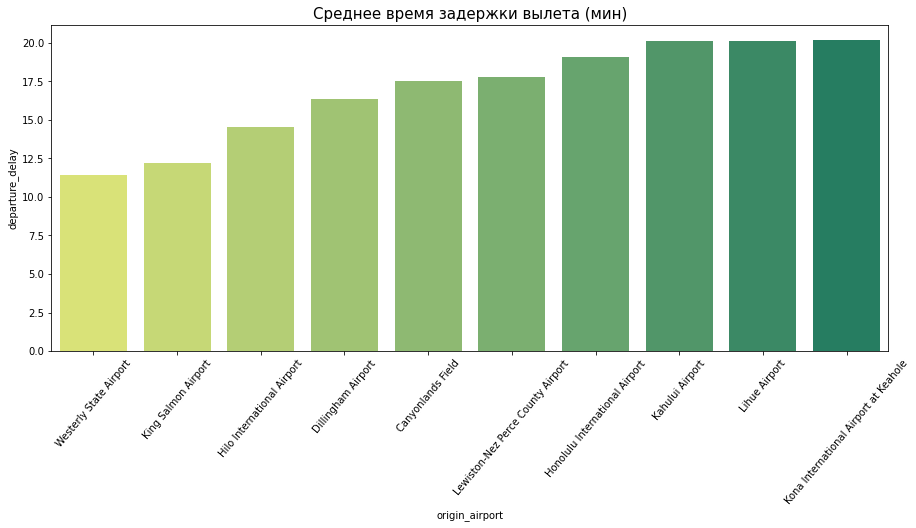

In [29]:
plt.figure(figsize=(15, 6))
ax=sns.barplot(x="origin_airport", y="departure_delay", data=air_min_delay, palette='summer_r') 
ax.set_xticklabels(ax.get_xticklabels(),rotation = 50)
plt.title('Среднее время задержки вылета (мин)', fontsize=15)
plt.show()

**Вывод:** Westerly State Airport - аэропорт с минимальной задержкой вылета.

### Самая пунктуальная авиакомпания на прилет в Los Angeles International Airport

In [30]:
flights.head(5)

,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,departure_time,...,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
0,1,1,4,AS,98,N407AS,Ted Stevens Anchorage International Airport,Seattle-Tacoma International Airport,5,2354.0,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,4,AA,2336,N3KUAA,Los Angeles International Airport,Palm Beach International Airport,10,2.0,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,4,US,840,N171US,San Francisco International Airport,Charlotte Douglas International Airport,20,18.0,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,4,AA,258,N3HYAA,Los Angeles International Airport,Miami International Airport,20,15.0,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,4,AS,135,N527AS,Seattle-Tacoma International Airport,Ted Stevens Anchorage International Airport,25,24.0,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
airlines_names = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()
flights["airline"].replace(airlines_names, inplace = True)

In [32]:
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [33]:
flights_to_losang=flights.loc[(flights['destination_airport']== 'Los Angeles International Airport')]

In [34]:
flights_to_losang.head()

,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,departure_time,...,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
101,1,1,4,Skywest Airlines Inc.,6512,N925SW,Fresno Yosemite International Airport,Los Angeles International Airport,535,530.0,...,650.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
103,1,1,4,Skywest Airlines Inc.,4986,N719SK,Austin-Bergstrom International Airport,Los Angeles International Airport,538,535.0,...,654.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
129,1,1,4,Skywest Airlines Inc.,2599,N435SW,Denver International Airport,Los Angeles International Airport,545,658.0,...,811.0,56.0,0,0,NaN,0.0,0.0,56.0,0.0,0.0
131,1,1,4,Skywest Airlines Inc.,6457,N560SW,Santa Maria Public Airport (Capt G. Allan Hanc...,Los Angeles International Airport,545,NaN,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
156,1,1,4,United Air Lines Inc.,1222,N68452,Orlando International Airport,Los Angeles International Airport,555,557.0,...,840.0,4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
flights_to_losang1=flights_to_losang.loc[(flights_to_losang['arrival_delay']>0)]
flights_to_losang2=flights_to_losang.loc[(flights_to_losang['arrival_delay']<=0)]

In [36]:
arrival_min_delay1 = flights_to_losang1.groupby('airline')['arrival_delay'].mean().sort_values().reset_index()
arrival_min_delay1

,airline,arrival_delay
0,Hawaiian Airlines Inc.,21.638202
1,Alaska Airlines Inc.,22.913029
2,US Airways Inc.,27.733333
3,Virgin America,27.969931
4,Southwest Airlines Co.,28.729095
5,Delta Air Lines Inc.,31.271977
6,Skywest Airlines Inc.,31.593320
7,JetBlue Airways,32.840000
8,Frontier Airlines Inc.,33.198592
9,United Air Lines Inc.,36.184633


In [37]:
arrival_min_delay2 = flights_to_losang2.groupby('airline')['arrival_delay'].mean().sort_values().reset_index()
arrival_min_delay2

,airline,arrival_delay
0,JetBlue Airways,-18.610354
1,American Airlines Inc.,-16.784155
2,American Eagle Airlines Inc.,-15.738636
3,Hawaiian Airlines Inc.,-15.272645
4,US Airways Inc.,-15.033633
5,Delta Air Lines Inc.,-14.429349
6,United Air Lines Inc.,-14.105716
7,Virgin America,-12.691035
8,Alaska Airlines Inc.,-12.108392
9,Spirit Air Lines,-11.739733


In [38]:
arrival_min_delay = flights_to_losang.groupby('airline')['arrival_delay'].mean().sort_values().reset_index()
arrival_min_delay

,airline,arrival_delay
0,Hawaiian Airlines Inc.,-4.668819
1,JetBlue Airways,0.155539
2,Alaska Airlines Inc.,0.536180
3,Delta Air Lines Inc.,2.135468
4,American Airlines Inc.,2.691133
5,US Airways Inc.,3.039387
6,Virgin America,4.424613
7,United Air Lines Inc.,8.551574
8,Skywest Airlines Inc.,8.645215
9,Southwest Airlines Co.,9.008806


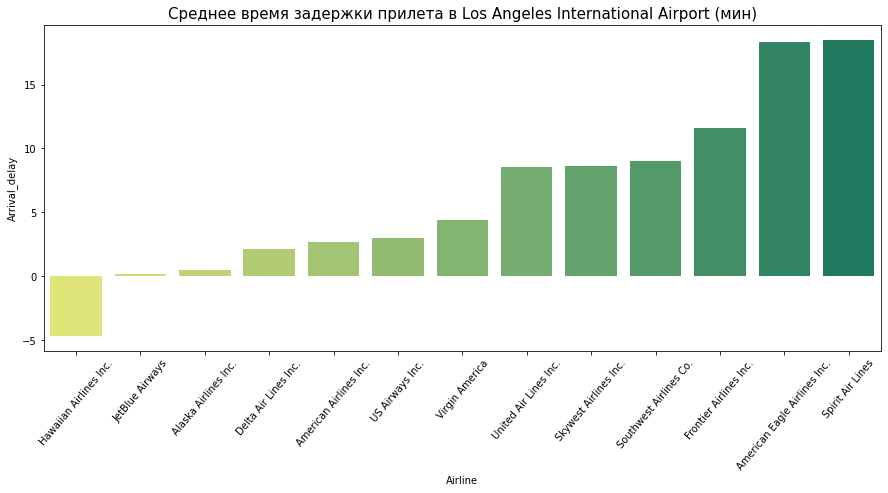

In [39]:
plt.figure(figsize=(15, 6))
ax=sns.barplot(x="airline", y="arrival_delay", data=arrival_min_delay, palette='summer_r') 
ax.set_xticklabels(ax.get_xticklabels(),rotation = 50)
plt.xlabel("Airline")
plt.ylabel("Arrival_delay")
plt.title('Среднее время задержки прилета в Los Angeles International Airport (мин)', fontsize=15)
plt.show()

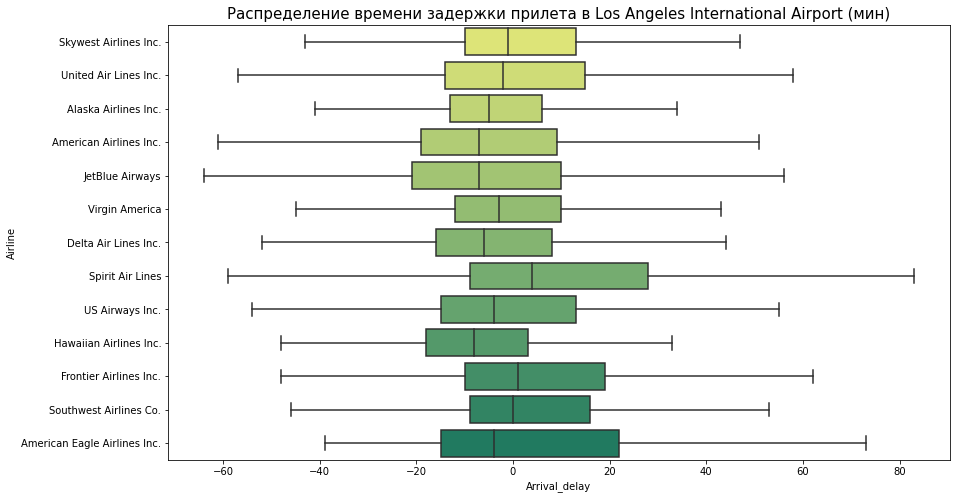

In [40]:
plt.figure(figsize=(14, 8))
fig = sns.boxplot(y="airline", x="arrival_delay", data=flights_to_losang,palette="summer_r", showfliers=False)
plt.ylabel("Airline")
plt.xlabel("Arrival_delay")
plt.title('Распределение времени задержки прилета в Los Angeles International Airport (мин)', fontsize=15)
plt.show(fig)

In [41]:
# Покажем на графике среднюю задержку вылета и прилета по каждой авиакомпании
airline_delay = flights.loc[:, ['airline', 'departure_delay','arrival_delay']].groupby('airline').mean().sort_values('departure_delay')

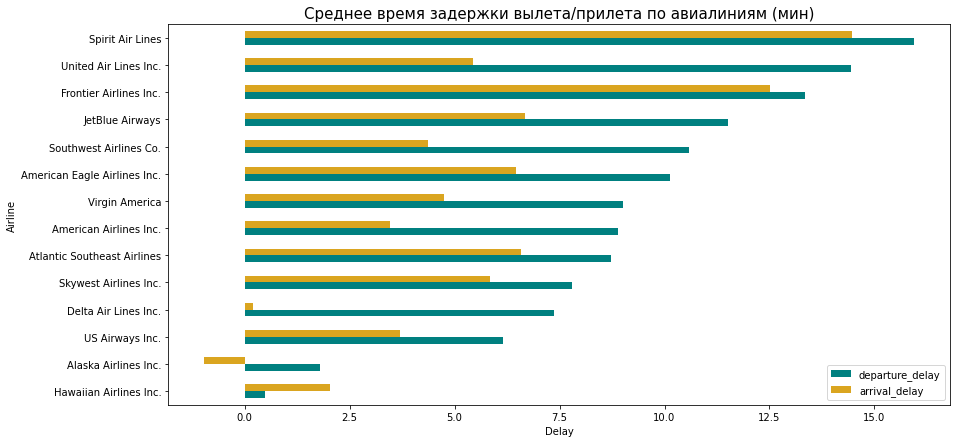

In [114]:
airline_delay.plot.barh(figsize=(14,7), stacked=False, color=['teal','goldenrod'])
plt.ylabel("Airline")
plt.xlabel("Delay")
plt.title('Среднее время задержки вылета/прилета по авиалиниям (мин)', fontsize=15)
plt.show()

**Вывод**: самой пунктуальной авикомпанией с учетом среднего времени задержек и раннего прилета является JetBlue Airways, если учитывать пунктуальность только с точки зрения опоздания, то самой пунктуальной является Hawaiian Airlines Inc., если же учитывать пунктуальность только с точки зрения раннего прилета, то самой пунктуальной является Skywest Airlines Inc.

### Аэропорт, где самолёты проводят больше всего времени на рулении (среднее значение)

In [64]:
flights.head()

,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,departure_time,...,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
0,1,1,4,Alaska Airlines Inc.,98,N407AS,Ted Stevens Anchorage International Airport,Seattle-Tacoma International Airport,5,2354.0,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,4,American Airlines Inc.,2336,N3KUAA,Los Angeles International Airport,Palm Beach International Airport,10,2.0,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,4,US Airways Inc.,840,N171US,San Francisco International Airport,Charlotte Douglas International Airport,20,18.0,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,4,American Airlines Inc.,258,N3HYAA,Los Angeles International Airport,Miami International Airport,20,15.0,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,4,Alaska Airlines Inc.,135,N527AS,Seattle-Tacoma International Airport,Ted Stevens Anchorage International Airport,25,24.0,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
airport_max_taxi=flights1.groupby('origin_airport')['taxi_out', 'taxi_in','departure_delay'].mean().reset_index().sort_values(by='taxi_out',ascending=False)
airport_max_taxi

<ipython-input-130-6f47d4596254>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  airport_max_taxi=flights1.groupby('origin_airport')['taxi_out', 'taxi_in','departure_delay'].mean().reset_index().sort_values(by='taxi_out',ascending=False)


,origin_airport,taxi_out,taxi_in,departure_delay
145,John F. Kennedy International Airport (New Yor...,28.774171,7.081289,32.728439
159,LaGuardia Airport (Marine Air Terminal),28.265548,7.562409,37.169940
226,Philadelphia International Airport,23.138075,7.959615,30.477716
37,Brainerd Lakes Regional Airport,23.078740,5.401575,22.086614
138,Ithaca Tompkins Regional Airport,22.214286,8.000000,35.857143
...,...,...,...,...
70,Deadhorse Airport (Prudhoe Bay Airport),7.245211,4.265060,26.229885
316,Wrangell Airport,7.123762,4.050505,34.638614
211,Nome Airport,7.096429,3.888889,24.510714
309,Wiley Post-Will Rogers Memorial Airport,6.956522,3.665441,26.420290


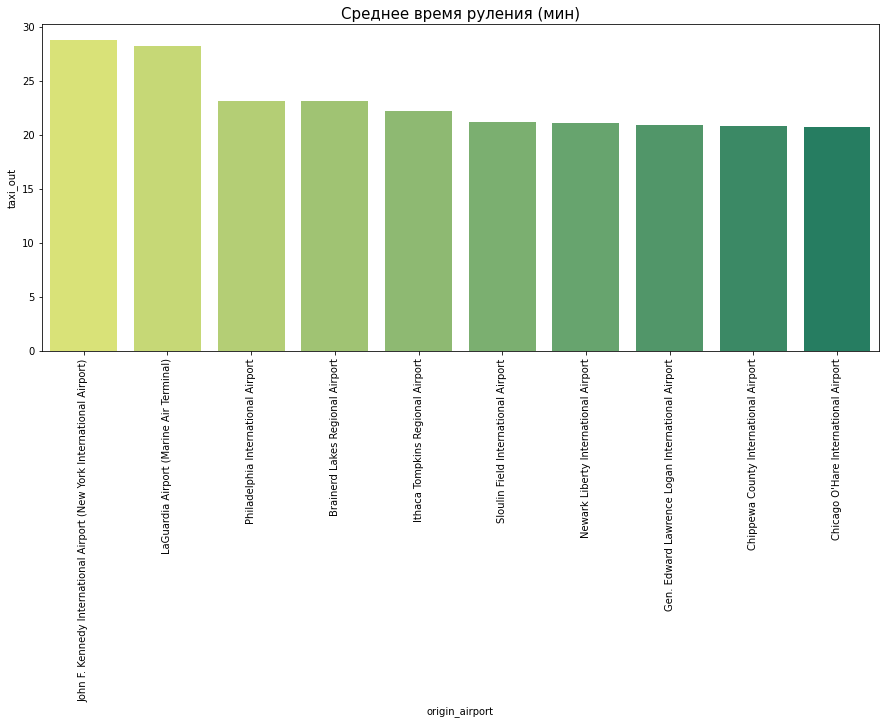

In [135]:
plt.figure(figsize=(15, 6))
ax=sns.barplot(x="origin_airport", y="taxi_out", data=airport_max_taxi.head(10), palette='summer_r') 
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.title('Среднее время руления (мин)', fontsize=15)
plt.show()

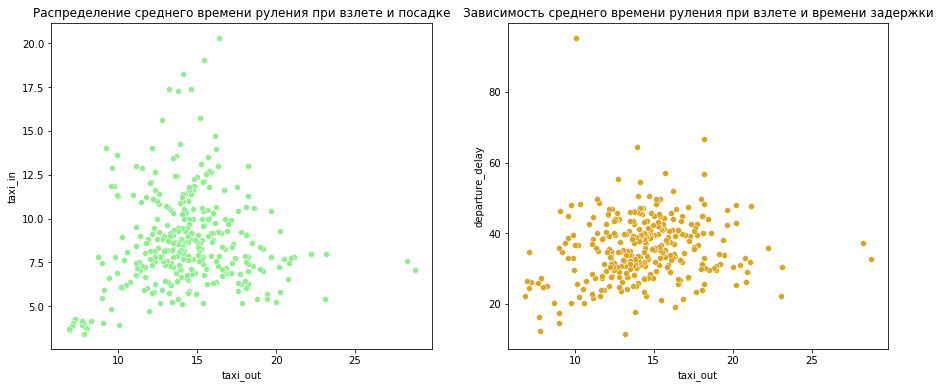

In [121]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1,2,1)
sns.scatterplot(data=airport_max_taxi, x="taxi_out", y="taxi_in", color= 'lightgreen')
plt.title('Распределение среднего времени руления при взлете и посадке', fontsize=12)
ax2 = fig.add_subplot(1,2,2)
sns.scatterplot(data=airport_max_taxi, x="taxi_out", y="departure_delay", color= 'goldenrod')
plt.title('Зависимость среднего времени руления при взлете и времени задержки', fontsize=12)
plt.show()

**Вывод**: John F. Kennedy International Airport (New York) является аэропортом с максимальным среднем временем руления перед взлетом.

In [ ]:
##